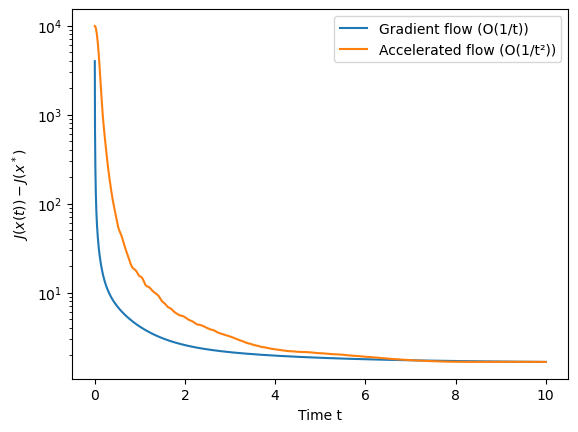

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 100
A = np.random.randn(n, n)
b = np.random.randn(n)

def J(x):
    return np.linalg.norm(A @ x - b)**2

def gradJ(x):
    return 2 * A.T @ (A @ x - b)

x_star = np.linalg.solve(A.T @ A, A.T @ b)
J_star = J(x_star)

dt = 1e-3
T = 10
steps = int(T / dt)
t_vals = np.linspace(dt, T, steps)

x = np.random.randn(n)
J_gf = []

for t in t_vals:
    x -= dt * gradJ(x)
    J_gf.append(J(x) - J_star)

x = np.random.randn(n)
v = np.zeros(n)  # velocity (x_dot)
J_acc = []

for t in t_vals:
    a = -3/t * v - gradJ(x)
    v += dt * a
    x += dt * v
    J_acc.append(J(x) - J_star)

plt.figure()
plt.plot(t_vals, J_gf, label='Gradient flow (O(1/t))')
plt.plot(t_vals, J_acc, label='Accelerated flow (O(1/t²))')
plt.yscale('log')
plt.xlabel('Time t')
plt.ylabel(r'$J(x(t)) - J(x^*)$')
plt.legend()
